## Importing Libraries

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve

## Data Preparation

In [2]:
# Creating two lists
# X -> Images
# y -> Labels

X = []
y = []

In [3]:
# with sub-structure
sub = os.listdir('/kaggle/working/lenses/sub')

for i in sub:
    img = cv2.imread('/kaggle/working/lenses/sub/' + i)
#     img = img / 255.0
    X.append(img)
    y.append(1)


# without sub-structure
no_sub = os.listdir('/kaggle/working/lenses/no_sub')

for i in no_sub:
    img = cv2.imread('/kaggle/working/lenses/no_sub/' + i)
#     img = img / 255.0
    X.append(img)
    y.append(0)

In [4]:
# shuffling the data

data = list(zip(X, y))

np.random.shuffle(data)
X, y = zip(*data)

del data

X = np.array(X)
y = np.array(y)

## Look Around Data

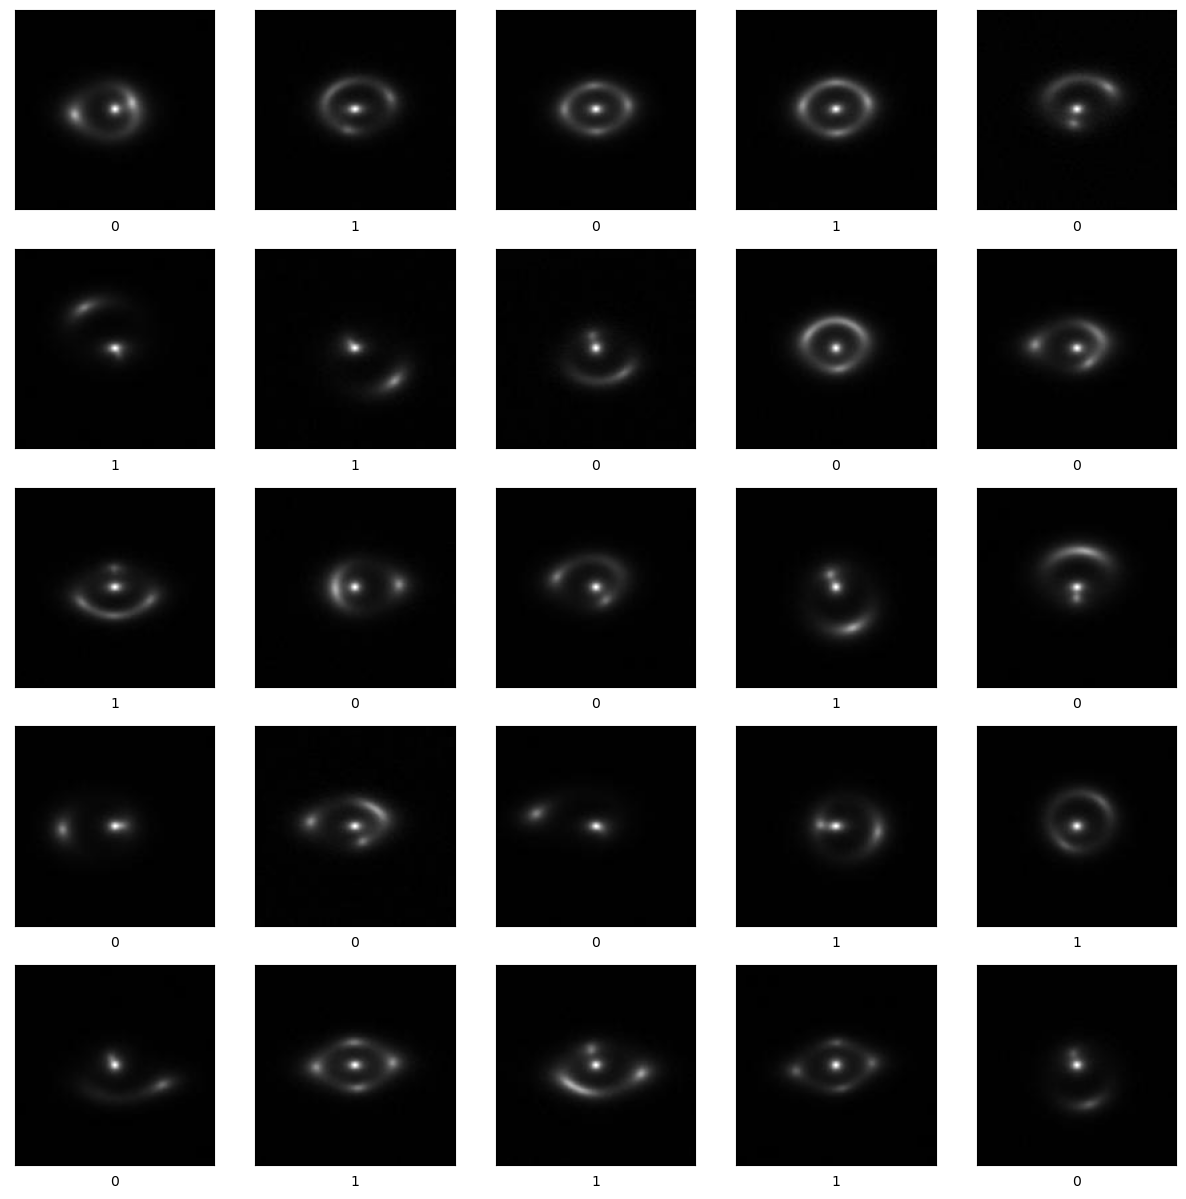

In [5]:
# 5 X 5 grid of random images 

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    num = np.random.randint(0, len(X))
    plt.imshow(X[num])
    plt.xlabel(y[num])
plt.show()

In [6]:
X.shape, y.shape

((10000, 150, 150, 3), (10000,))

In [7]:
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [8]:
del X, y

## Training and Evauation

In [9]:
# I have used Xception model with input shape (150 X 150 X 3)

model = tf.keras.applications.Xception(
    include_top=True, 
    input_shape=(150, 150, 3),
    weights=None,
    classes=2,
    classifier_activation='softmax'
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [10]:
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y))

Epoch 1/100
282/282 [==============================] - 70s 137ms/step - loss: 0.5594 - accuracy: 0.7137 - val_loss: 1.5854 - val_accuracy: 0.5000
Epoch 2/100
282/282 [==============================] - 37s 130ms/step - loss: 0.2493 - accuracy: 0.9041 - val_loss: 11.4124 - val_accuracy: 0.5000
Epoch 3/100
282/282 [==============================] - 37s 130ms/step - loss: 0.1364 - accuracy: 0.9496 - val_loss: 51.0531 - val_accuracy: 0.5000
Epoch 4/100
282/282 [==============================] - 37s 131ms/step - loss: 0.1193 - accuracy: 0.9582 - val_loss: 27.8277 - val_accuracy: 0.5000
Epoch 5/100
282/282 [==============================] - 37s 131ms/step - loss: 0.0930 - accuracy: 0.9672 - val_loss: 34.5860 - val_accuracy: 0.5000
Epoch 6/100
282/282 [==============================] - 37s 131ms/step - loss: 0.0828 - accuracy: 0.9704 - val_loss: 6.5430 - val_accuracy: 0.5080
Epoch 7/100
282/282 [==============================] - 37s 130ms/step - loss: 0.0765 - accuracy: 0.9727 - val_loss: 34.8

## Plotting ROC

In [17]:
predictions = model.predict(test_X)
predictions = [np.argmax(i) for i in predictions]

32/32 [==============================] - 1s 34ms/step


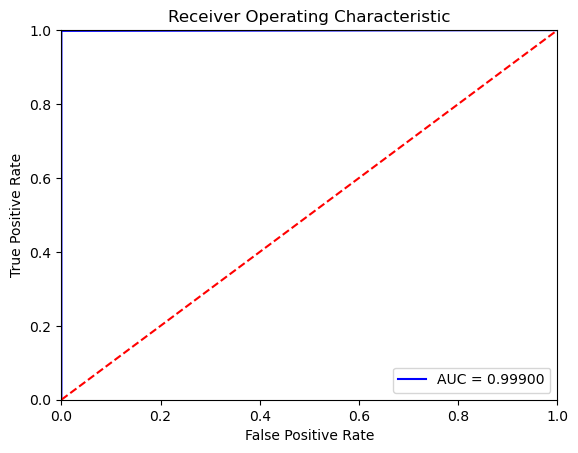

In [20]:
fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
model.save('150x150x3_Xception_100epoch_acc99.h5')

### Sahil bharodiya
#### Email: sahilbharodiya.ppsv2@gmail.com
#### Contact: +91 9173661451
#### LinkedIn: https://www.linkedin.com/in/sahil-bharodiya-5ab137202
#### GitHub: https://www.github.com/SahilBharodiya